In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
df=pd.read_csv('/content/preprocessing data (1).csv')
df

,Unnamed: 0,f0,f1,f2,f3,f4,target
0,0,1.081172,-7.120204,0.680698,0.753853,0.287723,1
1,1,0.959863,-6.558257,0.661967,0.766074,0.287658,1
2,2,0.885624,-6.590372,0.676322,0.770636,0.287718,1
3,3,0.907701,-6.995509,0.668329,0.753980,0.287320,1
4,4,0.844454,-6.508078,0.654847,0.761404,0.287131,1
...,...,...,...,...,...,...,...
9510,7335,1.275672,-2.170918,0.492680,0.681460,0.284750,3
9511,7336,1.290434,-0.585534,0.520101,0.724953,0.282635,3
9512,7337,1.163247,-0.428505,0.533896,0.717561,0.281436,3
9513,7338,1.324318,-1.359741,0.522031,0.704803,0.284642,3


In [122]:
df.drop(columns=df.columns[0],axis=1,inplace=True);


In [123]:
df

,f0,f1,f2,f3,f4,target
0,1.081172,-7.120204,0.680698,0.753853,0.287723,1
1,0.959863,-6.558257,0.661967,0.766074,0.287658,1
2,0.885624,-6.590372,0.676322,0.770636,0.287718,1
3,0.907701,-6.995509,0.668329,0.753980,0.287320,1
4,0.844454,-6.508078,0.654847,0.761404,0.287131,1
...,...,...,...,...,...,...
9510,1.275672,-2.170918,0.492680,0.681460,0.284750,3
9511,1.290434,-0.585534,0.520101,0.724953,0.282635,3
9512,1.163247,-0.428505,0.533896,0.717561,0.281436,3
9513,1.324318,-1.359741,0.522031,0.704803,0.284642,3


In [124]:
#type(df)
df.shape

(9515, 6)

In [125]:
X=df[['f0','f1','f2','f3','f4']]
y=df['target']

In [126]:
X = X.to_numpy()

In [127]:
type(X)

numpy.ndarray

In [128]:
X.reshape(-1,5)

array([[ 1.08117235, -7.12020445,  0.6806978 ,  0.75385284,  0.28772255],
       [ 0.95986348, -6.5582571 ,  0.66196656,  0.766074  ,  0.28765817],
       [ 0.88562375, -6.59037209,  0.6763221 ,  0.77063632,  0.28771833],
       ...,
       [ 1.16324663, -0.42850453,  0.53389639,  0.71756053,  0.28143615],
       [ 1.32431757, -1.35974145,  0.52203089,  0.70480287,  0.28464224],
       [ 1.73166049, -0.61629182,  0.55070013,  0.71671802,  0.28442608]])

In [129]:
X.shape

(9515, 5)

In [130]:
X=X.reshape((X.shape[0], X.shape[1], 1))

In [131]:
X.shape

(9515, 5, 1)

In [132]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# fit encoder to target variable and transform it to one-hot encoding
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

print(y_encoded)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [133]:
y_encoded.shape

(9515, 3)

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, random_state=42)

In [135]:
X_train.shape

(7612, 5, 1)

In [136]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# assuming you have already loaded your X and y variables
model = Sequential()

# add convolutional layer
model.add(Conv1D(64, 3, activation='relu', input_shape=(5, 1)))

# add max pooling layer
model.add(MaxPooling1D(pool_size=2))

# add flattening layer
model.add(Flatten())

# add dense layers for classification
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit model to data
#model.fit(X_train, y_train, epochs=50, batch_size=32)


In [137]:
#history=model.fit(X_train, y_train, epochs=50)
#score = model.evaluate(X_test, y_test)

In [138]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 3, 64)             256       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 3)                 195       
                                                                 
Total params: 4,611
Trainable params: 4,611
Non-trainable params: 0
____________________________________________________

In [139]:
history = model.fit(X_train, y_train, epochs=50,validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
238/238 [==============================] - 2s 4ms/step - loss: 0.5883 - accuracy: 0.7814 - val_loss: 0.4778 - val_accuracy: 0.8145
Epoch 2/50
238/238 [==============================] - 1s 3ms/step - loss: 0.4445 - accuracy: 0.8337 - val_loss: 0.3916 - val_accuracy: 0.8991
Epoch 3/50
238/238 [==============================] - 1s 3ms/step - loss: 0.3668 - accuracy: 0.8875 - val_loss: 0.3294 - val_accuracy: 0.9059
Epoch 4/50
238/238 [==============================] - 1s 3ms/step - loss: 0.3030 - accuracy: 0.9011 - val_loss: 0.2619 - val_accuracy: 0.9264
Epoch 5/50
238/238 [==============================] - 1s 3ms/step - loss: 0.2518 - accuracy: 0.9196 - val_loss: 0.2232 - val_accuracy: 0.9401
Epoch 6/50
238/238 [==============================] - 1s 3ms/step - loss: 0.2240 - accuracy: 0.9272 - val_loss: 0.1994 - val_accuracy: 0.9453
Epoch 7/50
238/238 [==============================] - 1s 3ms/step - loss: 0.2041 - accuracy: 0.9386 - val_loss: 0.2122 - val_accuracy: 0.9201
Epoch 

60/60 [==============================] - 0s 2ms/step


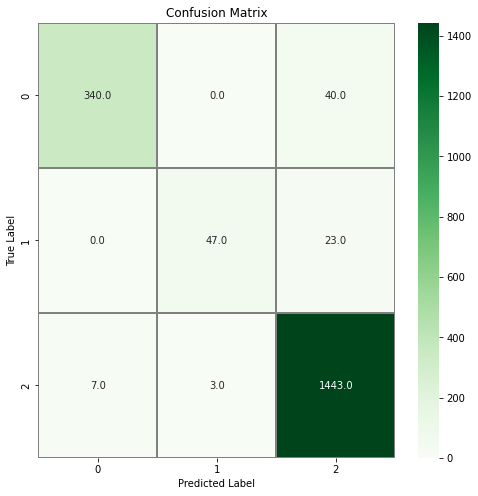

In [140]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


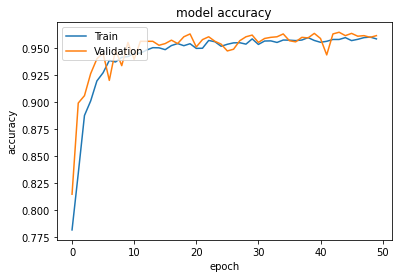

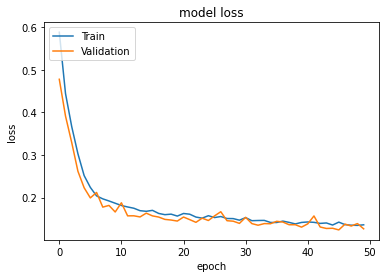

In [141]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()